<a href="https://colab.research.google.com/github/erinp0/DST-NN-Project/blob/main/Image-preproc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data to Google Colab

In order to load the image dataset from Kaggle, follow the instructions provided in this [Tutorial.](https://medium.com/nerd-for-tech/easy-downloading-kggle-data-to-google-drive-1be0a8835baa )

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Configuration environment

import os

os.environ['KAGGLE_USERNAME'] = "erinpollard3"

# username from the json file

os.environ['KAGGLE_KEY'] = "5f12e14973f41b71514e38d9a3d33bbb"

# key from the json file

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 96% 588M/612M [00:02<00:00, 180MB/s]
100% 612M/612M [00:02<00:00, 226MB/s]


In [ ]:
!unzip -q "/content/gtsrb-german-traffic-sign.zip"

Import necessary packages.

In [19]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

Assign the data directory paths to variables for easy recall.

In [12]:
data_dir = '/content'
train_path = '/content/Train'
test_path = '../content/Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3 #as the images are in colour so represented by 3 channels (RGB)

# Exploratory data Analysis

Firstly, let us explore the number of classes for the road signs.

In [13]:
number_class = len(os.listdir(train_path))
number_class

43

Let us display each of the different types of road signs in our dataset. The images below are digital example road signs, whereas our dataset is made up of photos of roadsigns so have a significantly lower resolution.

['Meta/27.png' 'Meta/0.png' 'Meta/1.png' 'Meta/10.png' 'Meta/11.png'
 'Meta/12.png' 'Meta/13.png' 'Meta/14.png' 'Meta/15.png' 'Meta/16.png'
 'Meta/17.png' 'Meta/18.png' 'Meta/19.png' 'Meta/2.png' 'Meta/20.png'
 'Meta/21.png' 'Meta/22.png' 'Meta/23.png' 'Meta/24.png' 'Meta/25.png'
 'Meta/26.png' 'Meta/28.png' 'Meta/29.png' 'Meta/3.png' 'Meta/30.png'
 'Meta/31.png' 'Meta/32.png' 'Meta/33.png' 'Meta/34.png' 'Meta/35.png'
 'Meta/36.png' 'Meta/37.png' 'Meta/38.png' 'Meta/39.png' 'Meta/4.png'
 'Meta/40.png' 'Meta/41.png' 'Meta/42.png' 'Meta/5.png' 'Meta/6.png'
 'Meta/7.png' 'Meta/8.png' 'Meta/9.png']


<ipython-input-45-22af1bada69b>:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


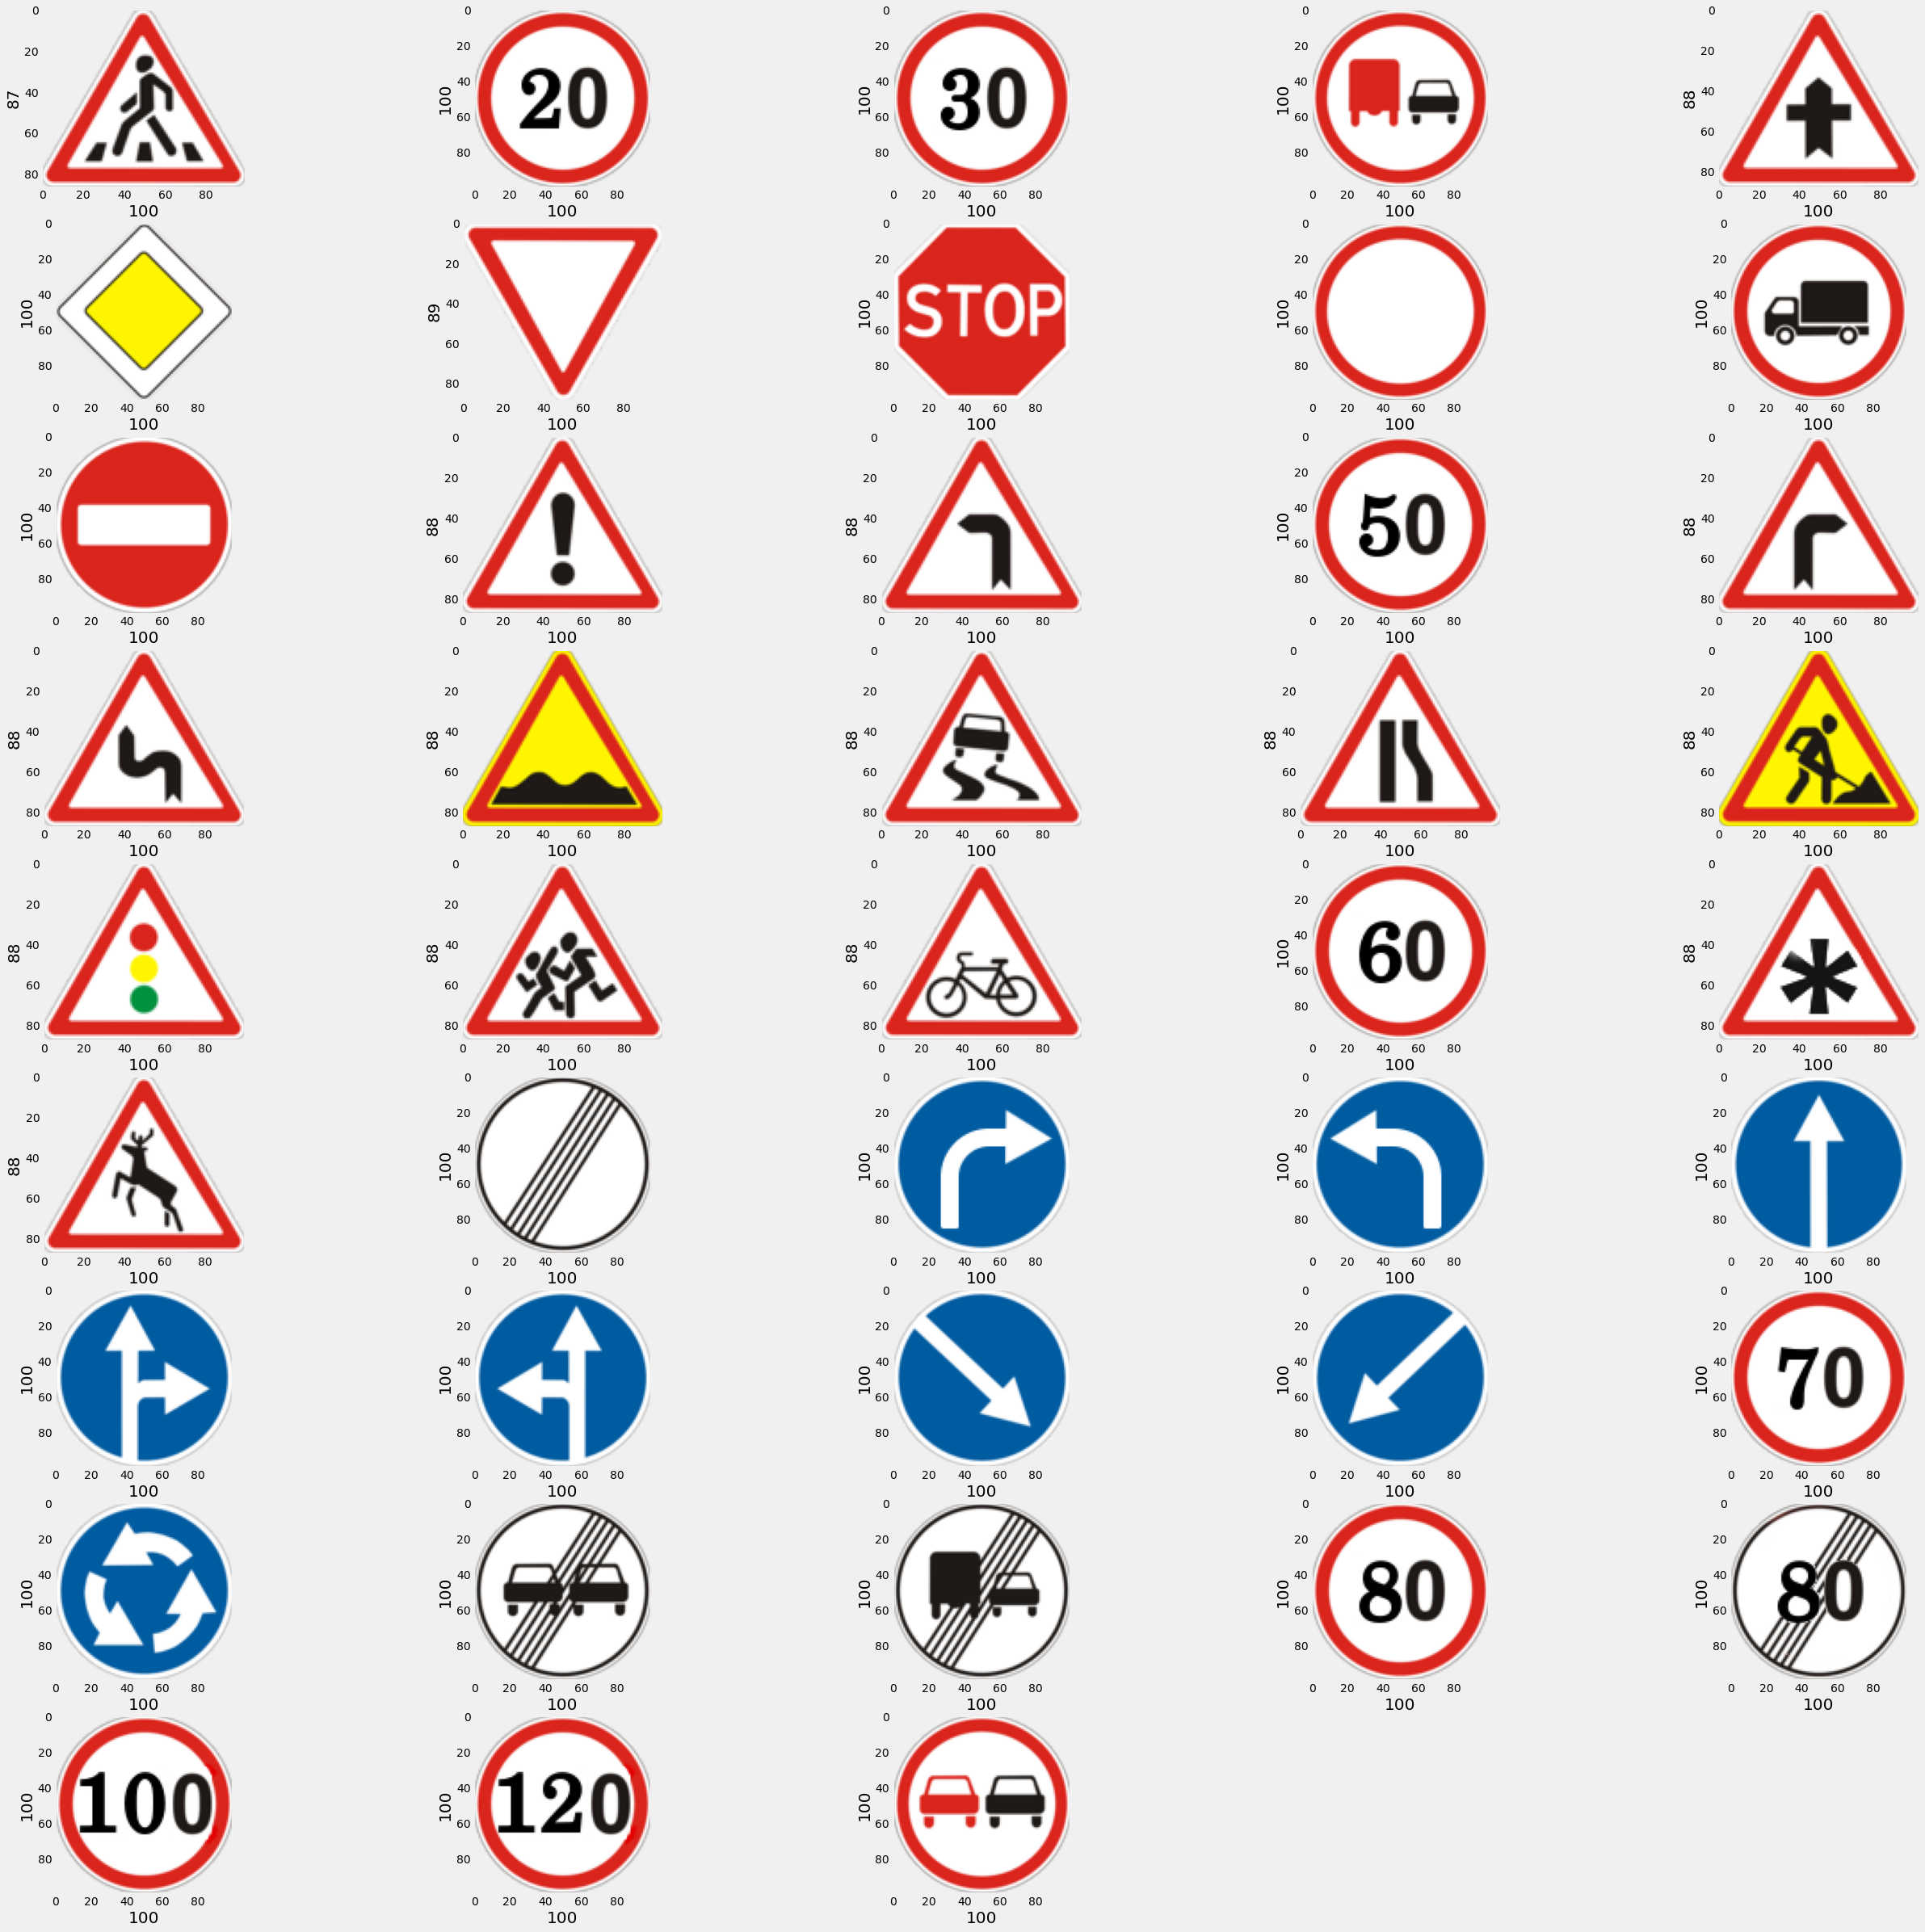

In [45]:
from matplotlib.image import imread
examples = pd.read_csv(data_dir + '/Meta.csv')
ex_imgs = examples["Path"].values
print(ex_imgs)
plt.figure(figsize=(40,40))

for i in range(int(number_class)):
  plt.subplot(9,5,int(i)+1)
  image_path = data_dir + '/' + ex_imgs[i]
  image = imread(image_path)
  plt.imshow(image)
  plt.grid(b=None)
  plt.xlabel(image.shape[1], fontsize = 20)#width of image
  plt.ylabel(image.shape[0], fontsize = 20)#height of image

   

We then create a dictionary which matches each numerical class label with a more explanatory label. E.g., images labelled '0' are 20km/h speed limit signs.

In [14]:
classes = { 0:'20km/h speed limit',
            1:'30km/h speed limit', 
            2:'50km/h speed limit', 
            3:'60km/h speed limit', 
            4:'70km/h speed limit', 
            5:'80km/h speed limit', 
            6:'End of speed limit (80km/h)', 
            7:'100km/h speed limit', 
            8:'120km/h speed limit', 
            9:'No passing', 
            10:'No passing vehicles over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing vehicles > 3.5 tons' }

Below we store the number of each class in the training set.

In [15]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for image_folder in folders:
    train_files = os.listdir(train_path + '/' + image_folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(image_folder)])
    
# Sorting the dataset on the basis of number of images in each class
#zipped_lists = zip(train_number, class_num)
#sorted_pairs = sorted(zipped_lists)
#tuples = zip(*sorted_pairs)
#train_number, class_num = [ list(tuple) for tuple in  tuples]

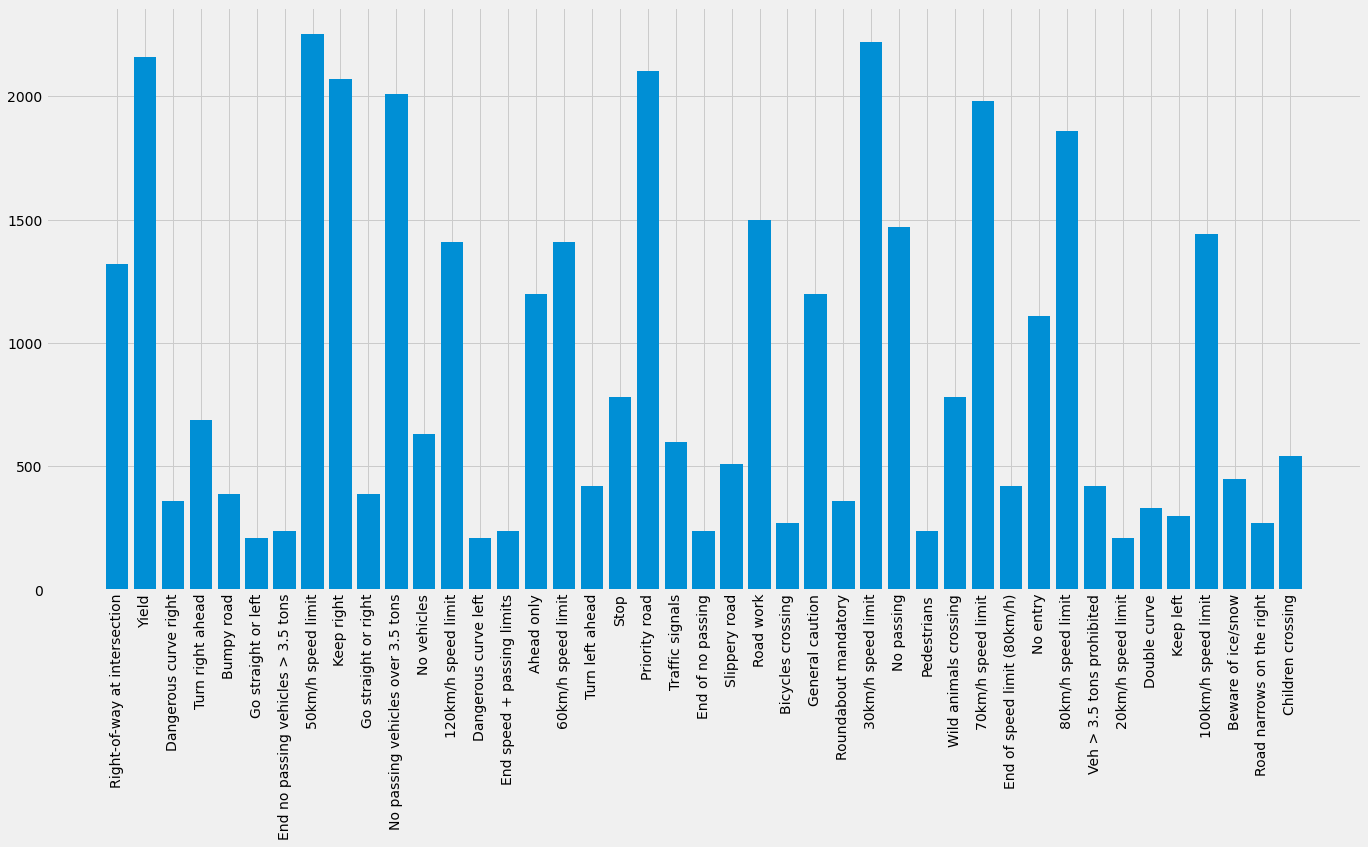

In [16]:
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

<ipython-input-18-bb1aa84dcb08>:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


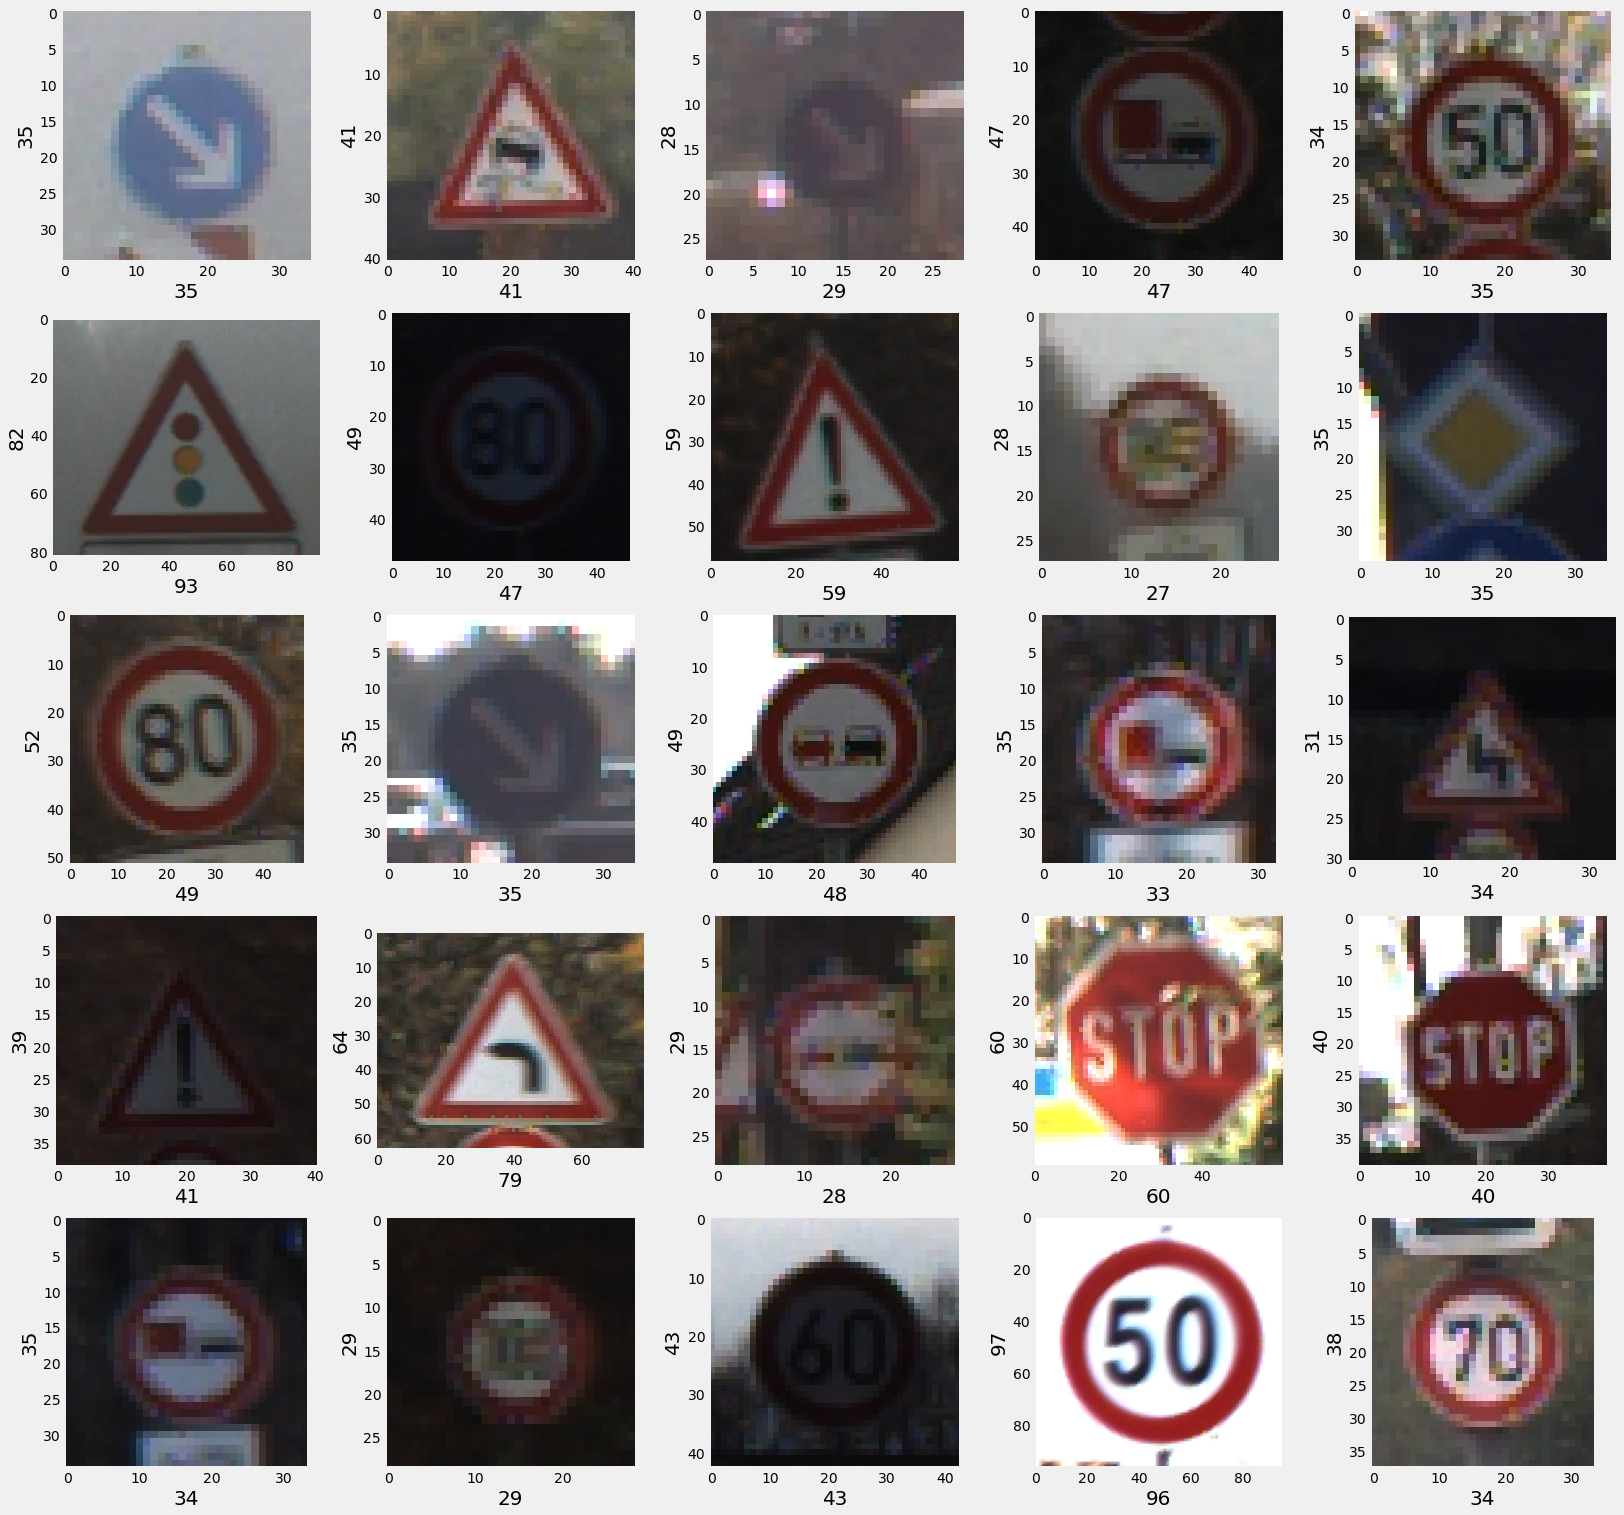

In [18]:
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Train.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

As you can see from the randomly selected images above, each image has a different height and width 9 in terms of numbers of pixels, hence we must resize each of the images so they have uniform height and width. If we did not do this, we would have issues with our neural network model. This exploratory data analysis has been taken from this [notebook.](https://www.kaggle.com/code/shivank856/gtsrb-cnn-98-test-accuracy)

# Data preprocessing

## Resizing images

Below we resize each of the images to the set image width and height to ensure uniformity. The image is then saved to its original file. The code for resizing has been adapted from [here](https://holypython.com/how-to-batch-resize-multiple-images-in-python-via-pil-library/).

In [33]:
for folder in os.listdir('/content/Train'):
  for file in os.listdir('/content/Train' +"/"+str(folder)):
      f_img = '/content/Train'+"/"+str(folder) +"/"+file
      img = Image.open(f_img)
      img = img.resize((IMG_WIDTH,IMG_HEIGHT))
      img.save(f_img)

<ipython-input-34-83681738b128>:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


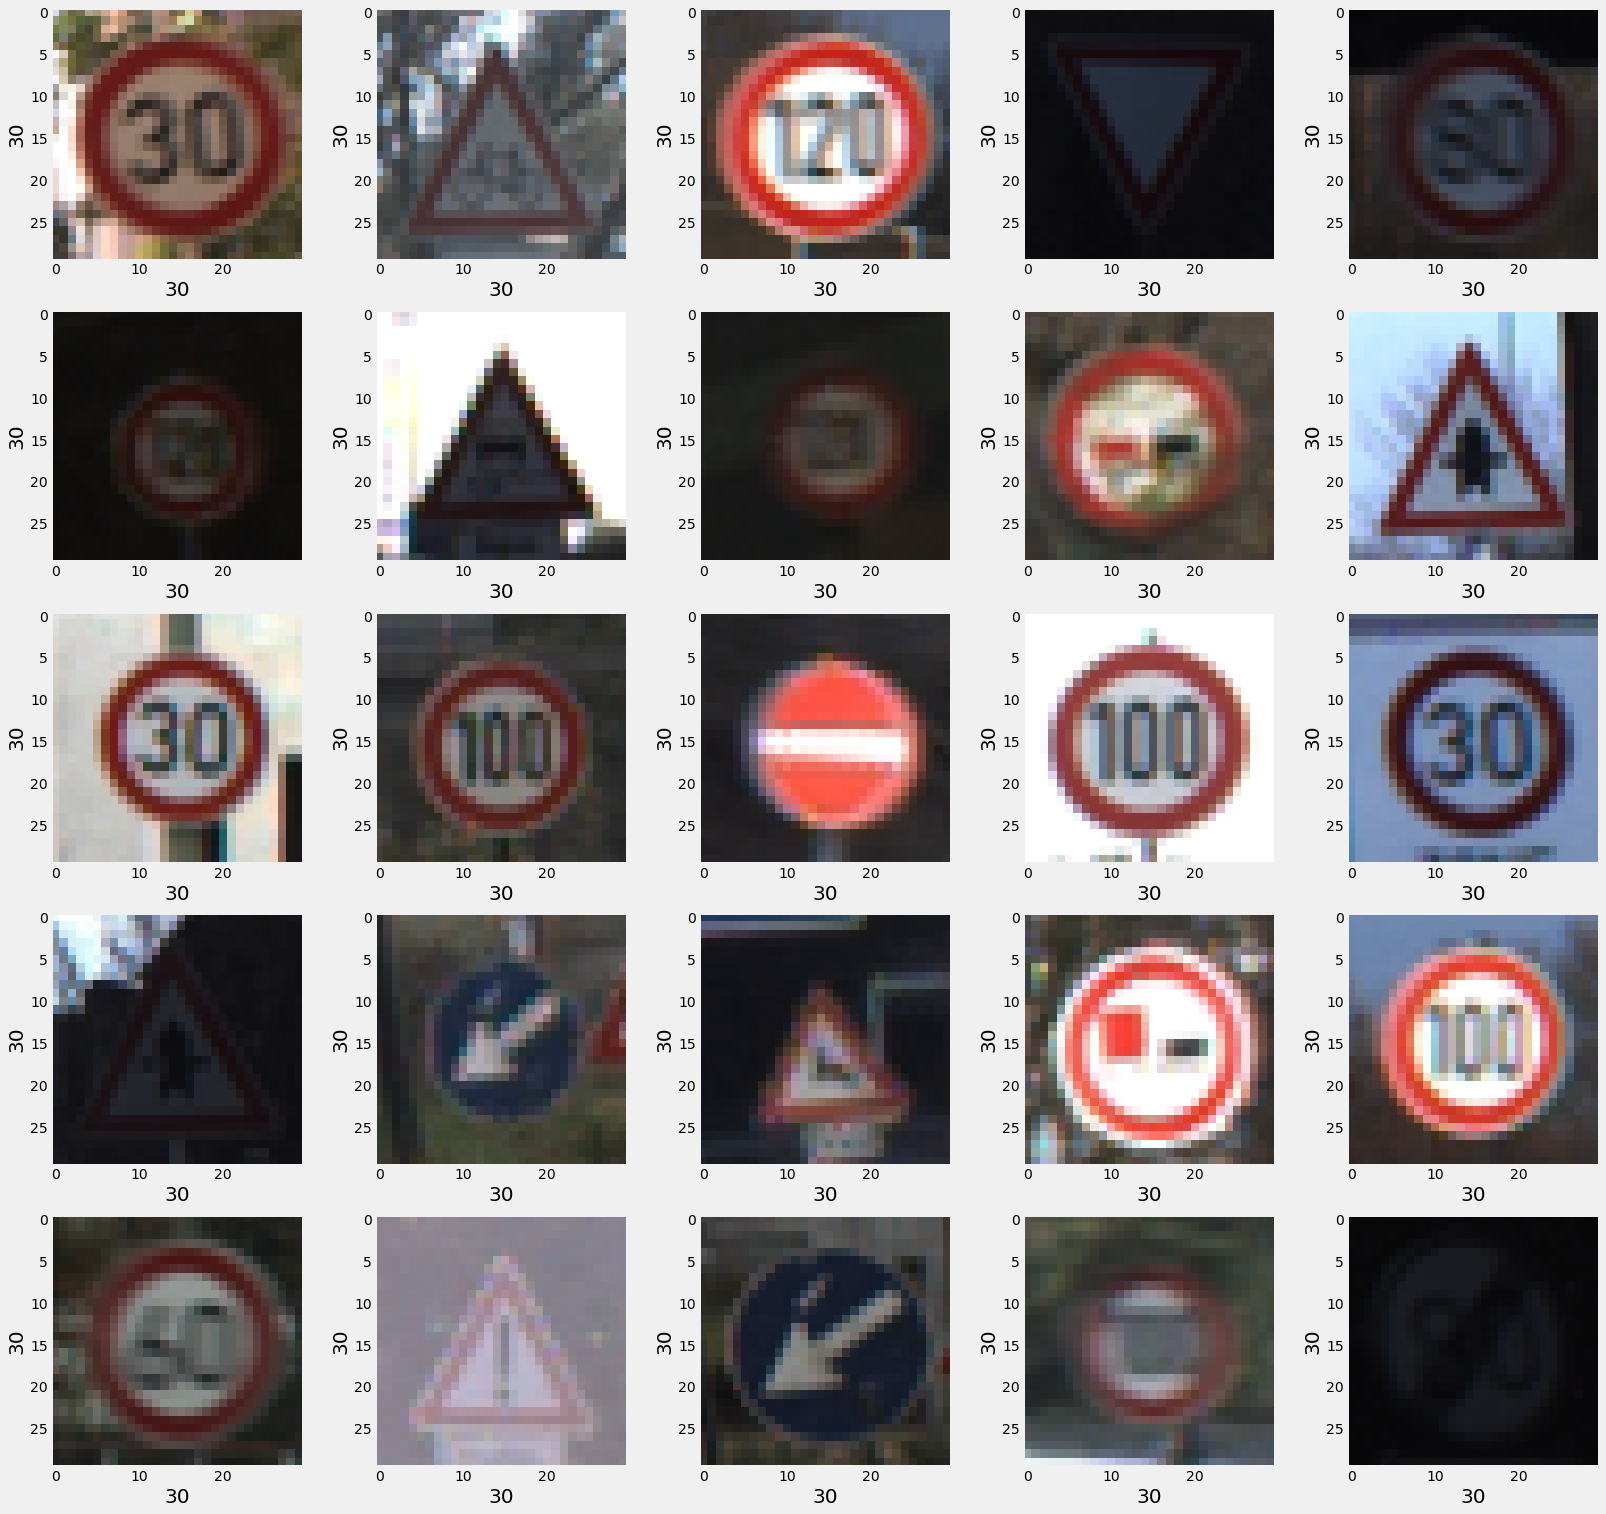

In [34]:
test = pd.read_csv(data_dir + '/Train.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

The above output demonstrates that resizing was done correctly.

## Enhance brightness

In [46]:
from PIL import ImageEnhance

<ipython-input-50-5a3a3d241f83>:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


Text(0, 0.5, '30')

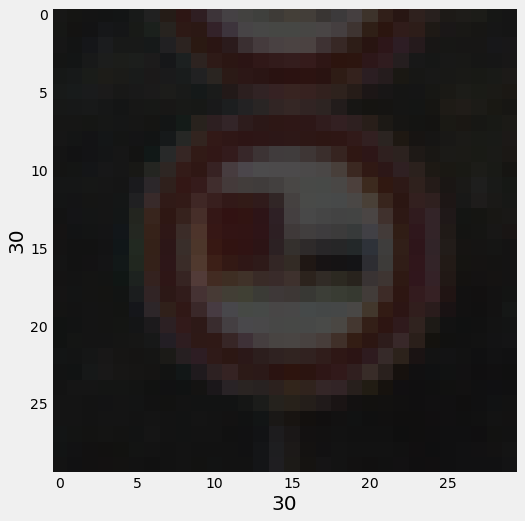

In [50]:
plt.figure(figsize=(8,8))
file = '/content/Train/10/00010_00000_00003.png'
plt.imshow(imread(file))
plt.grid(b=None)
plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

#img = Image.open(file)
#img.show()

In [ ]:
filter = ImageEnhance.Brightness(img)
img.filter(float)